<a href="https://colab.research.google.com/github/pratyushkumarrath/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
# Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.
"Exploratory Data Analysis can never be the whole story, but nothing else can serve as the foundation stone -- as the first step"
- John W. Tukey

# **1. INTRODUCTION**
Churn is the percentage of customers that stop using your service during a given time frame. Churn rate is one of the most important metrics that a company with recurring payment customers can calculate, and is most often expressed as a percentage of subscribers that have canceled their recurring payment plans or closure of an account or cancel their subscription or use another service provider. 
Churn could occur due to many different reasons and customer churn analysis helps to identify the cause and timing of the churn leading to implement effective churn retention strategies.

Here we have The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription We are going to explore and analyze the data to discover key factors responsible for customer churn and recommend some ways to ensure customer retention.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing the necessary libraries and data file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
telco_df = pd.read_csv('/content/drive/MyDrive/EDA Data Analysis/Telecom Churn.csv')

# 2. DATA INFORMATION

In [ ]:
# Finding shape of the data

telco_df.shape

(3333, 20)

In [ ]:
# Data Dictionaries present in the data
telco_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**DATA DICTIONARY** 

* **State:** the state in which the customer resides, indicated by a two-letter abbreviation
* **Account Length:** the number of days that this account has been active
* **Area Code:** the three-digit area code of the corresponding customer
* **International Plan:** whether the customer has an international calling plan: (yes/no)
* **Voice Mail Plan:** whether the customer has a voice mail feature: (yes/no)
* **Number VMail Message:** the average number of voice mail messages
* **Total Day Mins:** the total number of calling minutes used during the day
* **Total Day Calls:** the total number of calls placed during the day
* **Total Day Charge:** the billed cost of daytime calls
* **Total Eve Mins:** the total number of calling minutes used during the evening
* **Total Eve Calls:** the total number of calls placed during the evening
* **Total Eve Charge:** the billed cost of evening time calls
* **Total Night Mins:** the total number of calling minutes used during the night
* **Total Night Calls:** the total number of calls placed during the night
* **Total Night Charge:** the billed cost of nighttime calls
* **Total Intl Mins:** the total number of international minutes
* **Total Intl Calls:** the total number of international calls
* **Total Intl Charge:** the billed cost for international calls
* **Customer Service Calls:** the number of calls placed to Customer Service
* **Churn:** whether the customer left the service: true/false

In [ ]:
# Type of each attribute with null count

telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# Viewing top 5 data

telco_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Describe the data column wise

telco_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Number of unique data in every attribute
telco_df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
# Finding any missing value in the data

telco_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
# Finding duplicate values
telco_df.duplicated().sum()

0

**SUMMARY:** 

* It’s a dataset consists 3,333 records, 20 columns (types: bool(1), float64(8), int64(8), object(3)).
* Where each record uses the first 19 attributes to describe the profile of a certain customer and the last attribute to label this customer. 
* In which all the listed customers are from 51 different states having 3 different area codes.
* There is no duplicate value or any type of missing value such as 'null' or 'nan'. Hence the data is already in cleaned form.

# 3. DATA STATISTICS
Here we are going  to play around the data and take the informations regarding to that. 

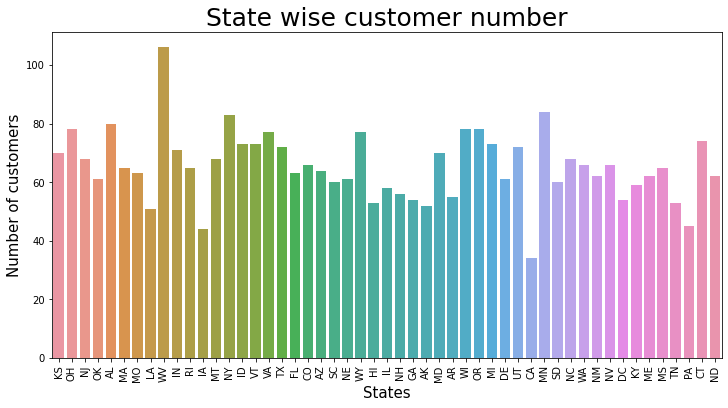

In [ ]:
# Creating plot between states and number of customers 
sns.countplot(x = telco_df['State'])
plt.rcParams['figure.figsize'] = (12,6)
plt.title('State wise customer number',fontsize=25)
plt.xlabel('States', fontsize=15)
plt.xticks (rotation= 90) 
plt.ylabel('Number of customers', fontsize=15)
plt.show()

* We can see that the state code 'WV' has the maximum number of customers where as the state code 'CA' has the minimum.

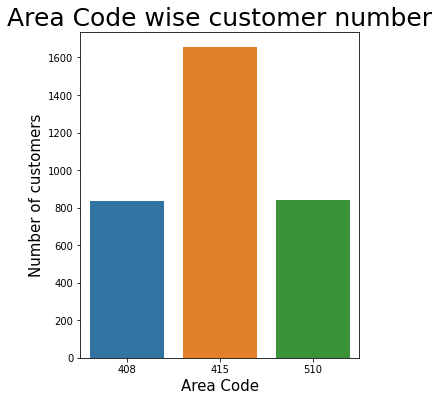

In [ ]:
#  Finding Area Code Wise Customer number
sns.countplot(x = telco_df['Area code'])
plt.rcParams['figure.figsize'] = (5,6)
plt.title('Area Code wise customer number',fontsize=25)
plt.xlabel('Area Code', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.show()

* By doing this we come to know that the area code 415 has maximum number of customers with very high margin with compare to the other two. 

In [ ]:
# mean of account length
mean_account_length = telco_df['Account length'].mean()
regular_customer = telco_df.loc[telco_df['Account length']>mean_account_length]
new_comers = telco_df.loc[telco_df['Account length']<mean_account_length]

* Regular customers we mean that the customers having account length more than the average value & Similarly less than average value is the new comers. 

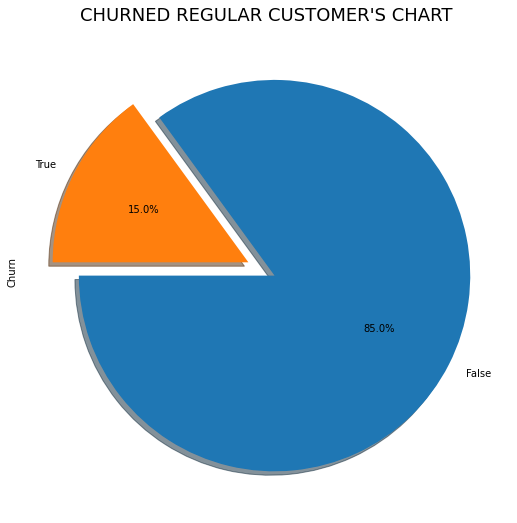

In [ ]:
# Finding percentage of churn in regular customers
regular_customer ['Churn'].value_counts().plot.pie(explode=[0.05,0.1],autopct='%1.1f%%',startangle=180,shadow=True,figsize=(9,9))
plt.title("CHURNED REGULAR CUSTOMER'S CHART",size = 18)
plt.show()

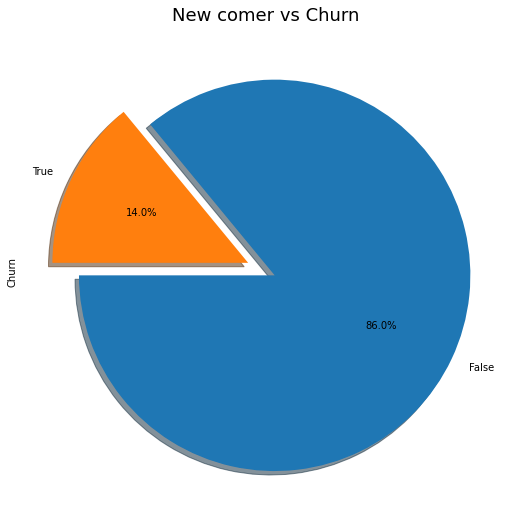

In [ ]:
# Finding percentage of churn in regular new comers
new_comers ['Churn'].value_counts().plot.pie(explode=[0.05,0.1],autopct='%1.1f%%',startangle=180,shadow=True,figsize=(9,9))
plt.title("New comer vs Churn",size =18)
plt.show()

* By comparing both the datas we can conclude that almost same number of customers in both case get churned. So there is no measures to find the loyality of the customers.

In [ ]:
# Comparing International plan and Percentage distribution of international Plan
int_plan = telco_df['International plan'].value_counts()
no_of_rows = telco_df.shape[0]
percentage_int_plan = (int_plan/no_of_rows)*100
print('Number of international Plan')
print(int_plan)
print('----------------------------')
print('Percentage Of International')
print(percentage_int_plan)

Number of international Plan
No     3010
Yes     323
Name: International plan, dtype: int64
----------------------------
Percentage Of International Plan
No     90.309031
Yes     9.690969
Name: International plan, dtype: float64


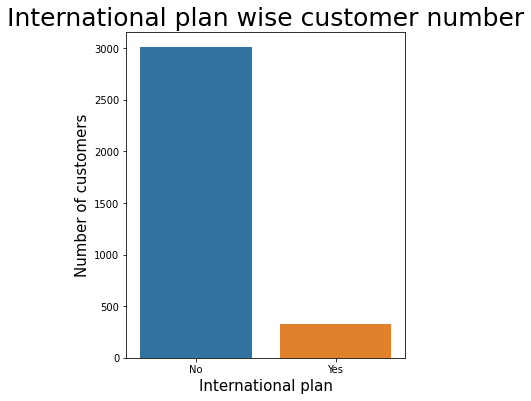

In [ ]:
# Customer with international plan and with no international plan
sns.countplot(x = telco_df['International plan'])
plt.rcParams['figure.figsize'] = (5,6)
plt.title('International plan wise customer number',fontsize=25)
plt.xlabel('International plan', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.show()

* Here, We clearly see that more customers have no International Plan than that of International Plan. It is almost 10 times the other.


In [ ]:
# Costumers with Voice mail plan and its percentage distribution 
vmail_plan = telco_df['Voice mail plan'].value_counts()
percentage_of_vmail_plan = (vmail_plan/no_of_rows)*100
print('Number of voice mail Plan')
print(vmail_plan)
print('----------------------------')
print('Percentage Of Voice mail plan')
print(percentage_of_vmail_plan)

Number of voice mail Plan
No     2411
Yes     922
Name: Voice mail plan, dtype: int64
----------------------------
Percentage Of Voice mail plan
No     72.337234
Yes    27.662766
Name: Voice mail plan, dtype: float64


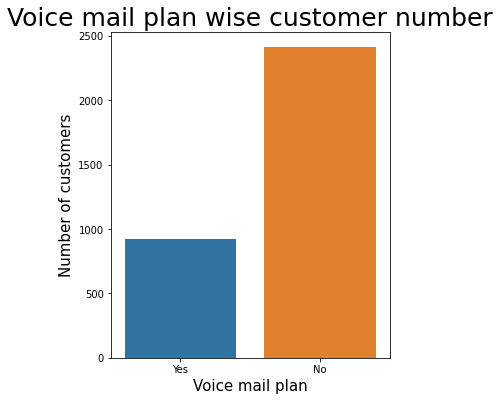

In [ ]:
#Costumers with Voice mail plan and with no Voice mail plan
sns.countplot(x = telco_df['Voice mail plan'])
plt.rcParams['figure.figsize'] = (5,6)
plt.title('Voice mail plan wise customer number',fontsize=25)
plt.xlabel('Voice mail plan', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.show()

* This graph shows that most no. of customers don't use voice mail plan.

In [ ]:
# Sum of Total day charge , Total eve charge , Total night charge and  Total intl charge
charges = telco_df['Total day charge'].sum(),telco_df['Total eve charge'].sum(),telco_df['Total night charge'].sum(),telco_df['Total intl charge'].sum()
charges

(101864.17000000001, 56939.44, 30128.07, 9214.349999999999)

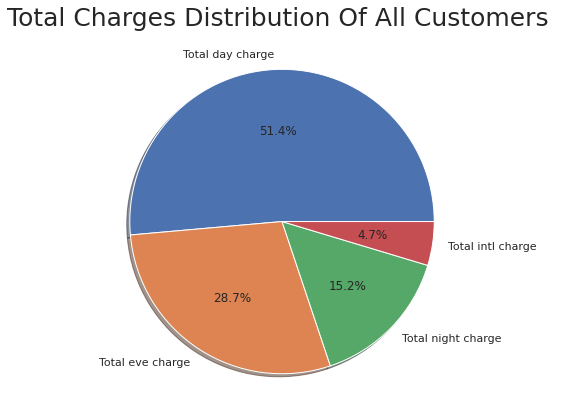

In [ ]:
# Total Charges Distribution Of All Customers
fig = plt.figure(figsize = (10, 7))
plt.pie(charges, labels = ['Total day charge', 'Total eve charge' , 'Total night charge' , 'Total intl charge' ],
        autopct ='%1.1f%%',
        shadow = True )
plt.title('Total Charges Distribution Of All Customers ',size = 25 )
plt.show()

* From this chart we conclude that Total day charge for all customer is highest and Total intl charge is lowest.

In [ ]:
# Regular charge , Total Regular minutes , Charges per minute and intl charge per minute for each customer 
telco_df['Total minutes'] = telco_df['Total day minutes'] + telco_df['Total eve minutes'] + telco_df['Total night minutes'] + telco_df['Total intl minutes']
telco_df['Total charge'] = telco_df['Total day charge'] + telco_df['Total eve charge'] + telco_df['Total night charge'] + telco_df['Total intl charge']
telco_df['Regular charge'] = telco_df['Total day charge'] + telco_df['Total eve charge'] + telco_df['Total night charge']
telco_df['Total regular minute']= telco_df['Total day minutes'] + telco_df['Total eve minutes'] + telco_df['Total night minutes']
telco_df['charge per minute'] = (telco_df['Total day charge'] + telco_df['Total eve charge'] + telco_df['Total night charge'])/ (telco_df['Total day minutes'] + telco_df['Total eve minutes'] + telco_df['Total night minutes'])
telco_df['intl charge per minute'] = telco_df['Total intl charge'] / telco_df['Total intl minutes']
charge_per_minute = telco_df['charge per minute'].mean()
intl_charge_per_minute = telco_df['intl charge per minute'].mean()
print(f'Charge per minute for each customer is {charge_per_minute} ')
print(f'Intl charge per minute for each customer is {intl_charge_per_minute} ')


Charge per minute for each customer is 0.09728939604058527 
Intl charge per minute for each customer is 0.27005654558216496 


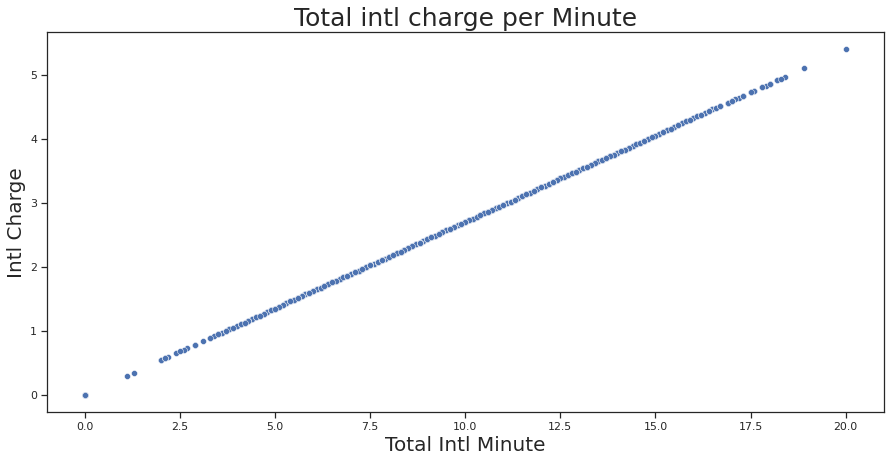

In [ ]:
# Plot between Total Intl minutes and Total Intl charge
sns.scatterplot(x="Total intl minutes", y="Total intl charge",  data=telco_df,palette='hls')
plt.title('Total intl charge per Minute',size =25)
plt.xlabel('Total Intl Minute', fontsize = 20)
plt.ylabel('Intl Charge', fontsize = 20)
plt.rcParams['figure.figsize'] = (15,8)

* Relation between Total intl charge and Total intl minutes clearly indicates that Intl charge per minute for each customer is constant.

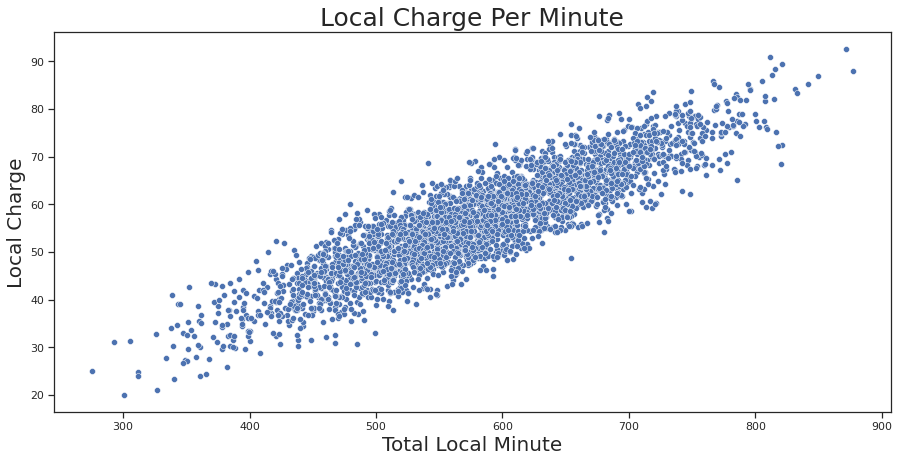

In [ ]:
# Local charge per minute
sns.scatterplot(x="Total regular minute",y=  "Regular charge", data=telco_df,palette='hls')
plt.xlabel('Total Local Minute', fontsize = 20)
plt.ylabel('Local Charge', fontsize = 20)
plt.title('Local Charge Per Minute',size =25)
plt.show()

* Day charge , eve charge and night charge per minute for different states are different. 




In [ ]:
# LET'S FIND OUT NUMBER OF VALUES A UNIQUE ITEM HOLD
Total_churn_values=(telco_df.Churn.value_counts())
print(Total_churn_values)

False    2850
True      483
Name: Churn, dtype: int64


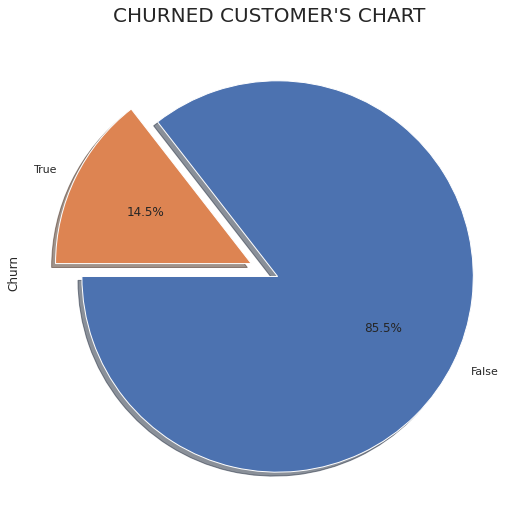

In [ ]:
# SO LET'S MAKE A PIE CHART FOR THE BETTER UNDERSTANDING OF HOW MANY PERCENTAGE OF CUSTOMERS GET CHURNED.
telco_df ['Churn'].value_counts().plot.pie(explode=[0.05,0.1],autopct='%1.1f%%',startangle=180,shadow=True,figsize=(9,9))
plt.title("CHURNED CUSTOMER'S CHART",size = 20)
plt.show()

* SO BY ABOVE ANALYSIS WE GET TO KNOW THAT 14.5 PERCENT OF CUSTOMERS GOT CHURNED AND 85.5 PERCENT OF CUSTOMERS GET REMAIN WITH THE COMPANY"

# 4. ANALYZING THE DATA IN VARIOUS WAY

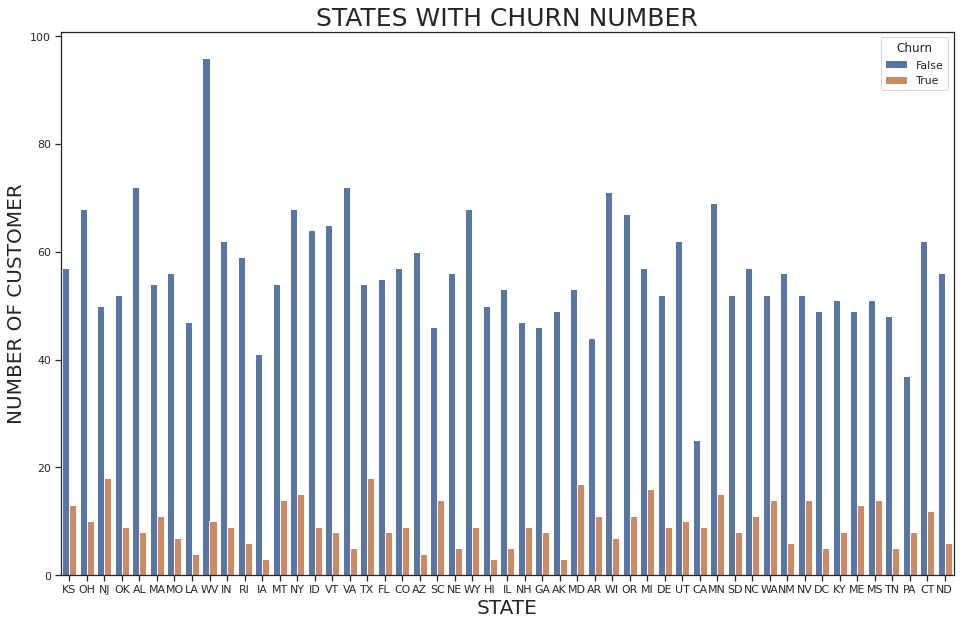

In [ ]:
#SO HERE WE USE STATE COLOUMN TO DO COMAPRISSION LIKE WHICH STATE VS CHURNED CUSTOMERS
sns.set(style='ticks')
plt.figure(figsize=(16,10))
ax=sns.countplot(x='State',hue='Churn',data=telco_df)
plt.title("STATES WITH CHURN NUMBER", fontsize = 25)
plt.xlabel('STATE', fontsize = 20)
plt.ylabel('NUMBER OF CUSTOMER', fontsize = 20)
plt.show()

* SO ABOVE GRAPH SHOWS STATE WISE CHURNED AND ACTIVE CUSTOMERS STATE WISE!

* LETS DO FIND SOME MORE INSIGHTS IN STAE COLUMN LIKE(MAX,MIN,TOP,LEAST) etc.



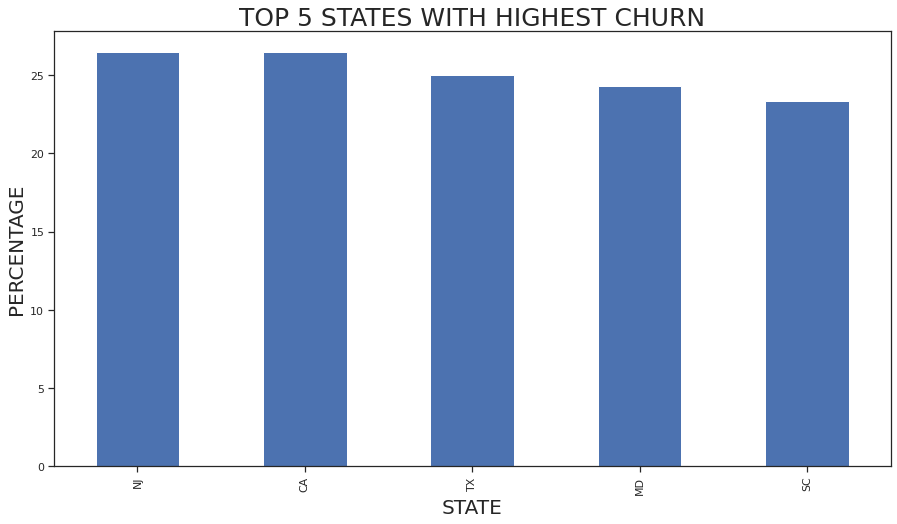

In [ ]:
# TOP 5 STATES HAVING HIGHEST CHURN RATES!
plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.copper(np.linspace(0, 1, 15))
((telco_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending =False).head(5).plot.bar()
plt.title("TOP 5 STATES WITH HIGHEST CHURN", fontsize = 25)
plt.xlabel('STATE', fontsize = 20)
plt.ylabel('PERCENTAGE', fontsize = 20)
plt.show()

* SO HERE WE CAN SAY THAT TOP 5 STATES WHICH HAVE HIGHEST NUMBER OF CHURN PERCENTAGE ARE (IN,CA,TX,MD,SC) SO THESES STATES HAVE TO BE CAREFUL TOWARDS CUSTOMER BECAUSE THIER LOOSING PERCENTAGE IS VERY HIGH.

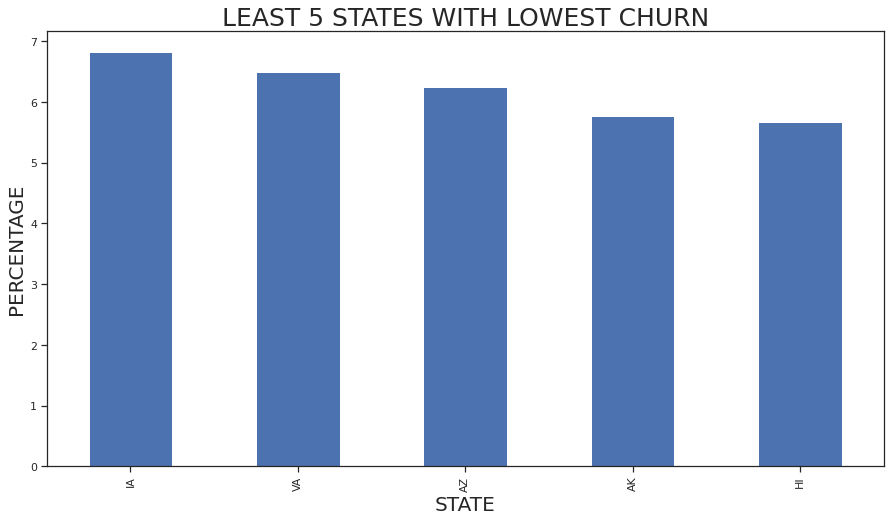

In [ ]:
# TOP 5 STATES HAVING LOWEST CHURN RATES.
plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.copper(np.linspace(0, 1, 15))
((telco_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending =False).tail(5).plot.bar()
plt.title("LEAST 5 STATES WITH LOWEST CHURN", fontsize = 25)
plt.xlabel('STATE', fontsize = 20)
plt.ylabel('PERCENTAGE', fontsize = 20)
plt.show()

* SO HERE WE CAN SAY THAT TOP 5 STATES WHICH HAVE LOWEST NUMBER OF CHURN PERCENTAGE ARE (IA,VA,AZ,AK,HI) 
* SO BY ANALYSIS WE GET TO KNOW THAT THEY PROVIDED GOOD SERVICES COMPARE WITH OTHER STATES.

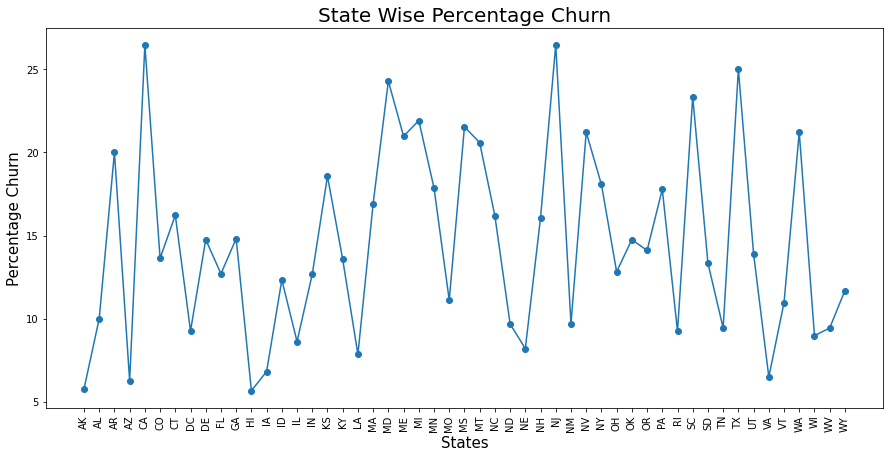

In [ ]:
# State Wise Churn Rate
State_data = pd.crosstab(telco_df["State"],telco_df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
plt.rcParams['figure.figsize'] = (15,7)
plt.plot(State_data['Percentage_Churn'],marker='o')
plt.xlabel('States', size = 15)
plt.ylabel('Percentage Churn',size = 15)
plt.title('State Wise Percentage Churn', size= 20)
plt.xticks (rotation=90)
plt.show()

* Churn Rate is maximum in states CA,NJ,TX and Churn Rate is minimum in states AK,AZ,HI.

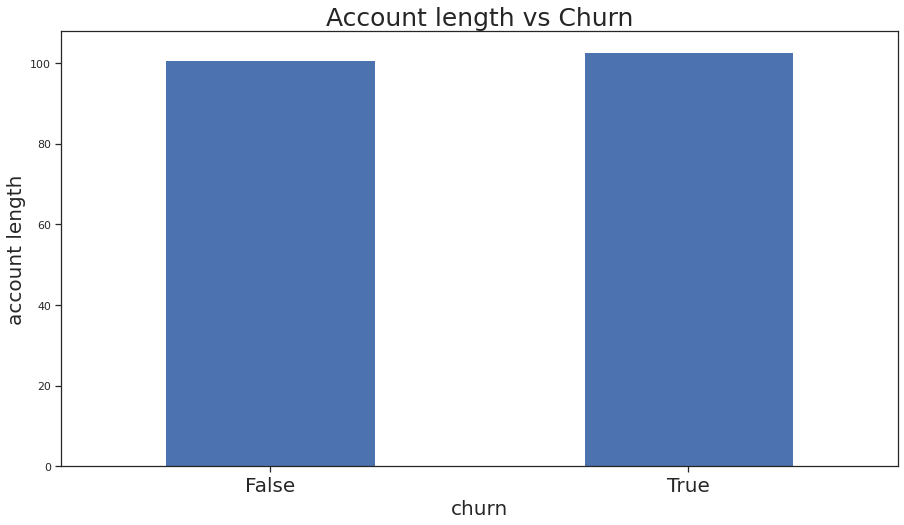

In [ ]:
# Account length vs Churn
telco_df.groupby('Churn')['Account length'].mean().plot(kind='bar') 
plt.xlabel('churn', fontsize = 20)
plt.ylabel('account length', fontsize = 20)
plt.title('Account length vs Churn',size= 25)
plt.xticks(size=20,rotation = 0)
plt.show();

* The churned people and non-churned people have almost same average of account length

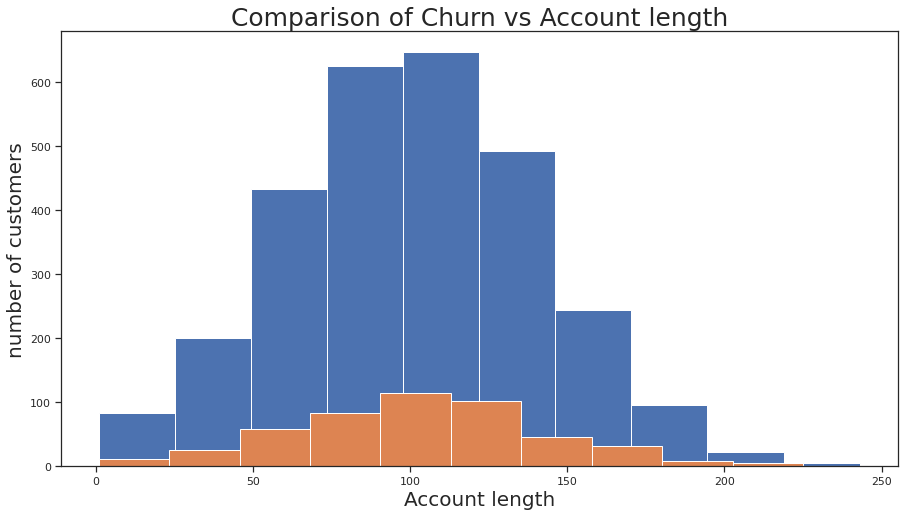

In [ ]:
# Comparing account length with the churn rate
telco_df.groupby('Churn')['Account length'].plot.hist()
plt.xlabel('Account length',size = 20) 
plt.ylabel('number of customers',size =20)
plt.title('Comparison of Churn vs Account length',size = 25)
plt.show();

* The churn rate is proportional according to the account length. Hence we can't cnclude anything related to churning.

In [ ]:
def relation_bar(x,y):
    
    telco_df.groupby([x,y]).size().unstack(level=-1).plot.bar()
    plt.rcParams['figure.figsize'] = (15,7)
    plt.xlabel( x ,fontsize = 25)
    plt.ylabel( y +' '+'count',fontsize = 25)
    plt.title("Analyzing" +' '+ y +' '+ "With" +' '+ x ,fontsize = 25)
    plt.show()

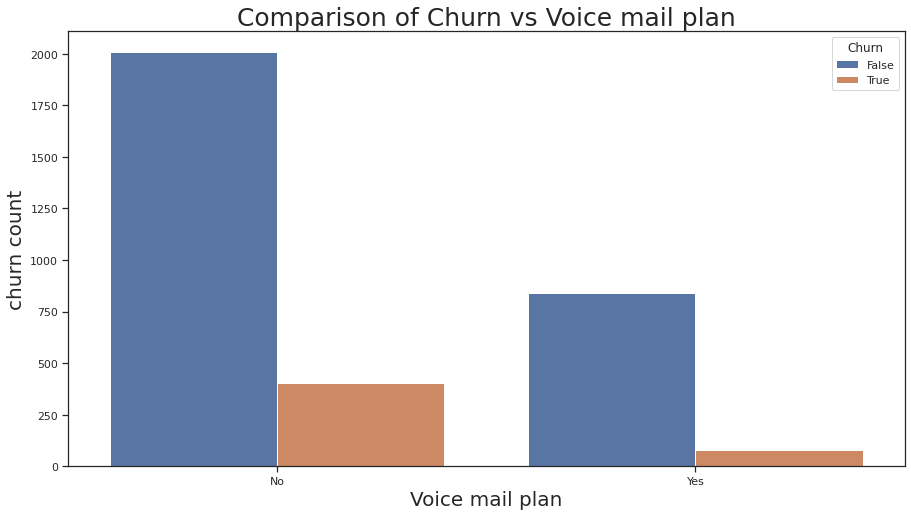

In [ ]:
#  Churn vs Voice mail plan taken
sns.countplot(x='Voice mail plan', hue='Churn', data=telco_df, order = telco_df['Voice mail plan'].value_counts().index);
plt.xlabel('Voice mail plan', fontsize = 20)
plt.ylabel('churn count', fontsize = 20)
plt.title('Comparison of Churn vs Voice mail plan',size = 25)
plt.show()

* We can conclucde that the vmail service is not effective with respect to profit.

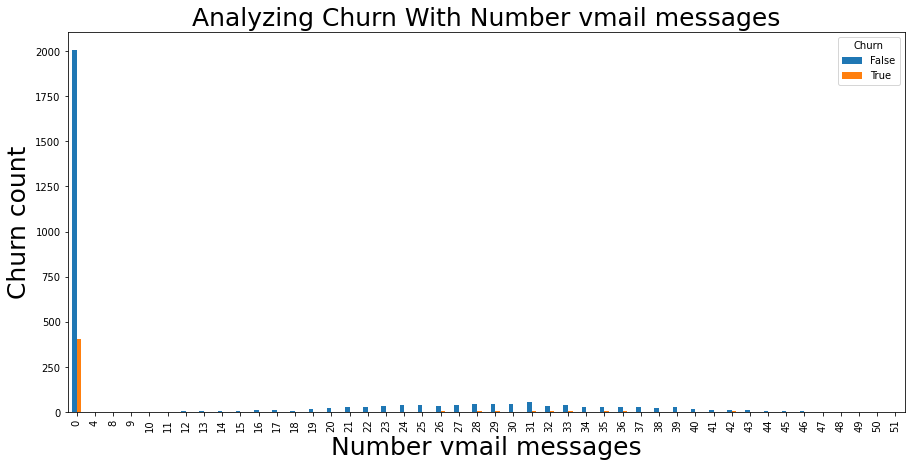

In [ ]:
# Comparing Vmail with the churn
relation_bar('Number vmail messages','Churn')

* Here we can't find any thing related to churn.

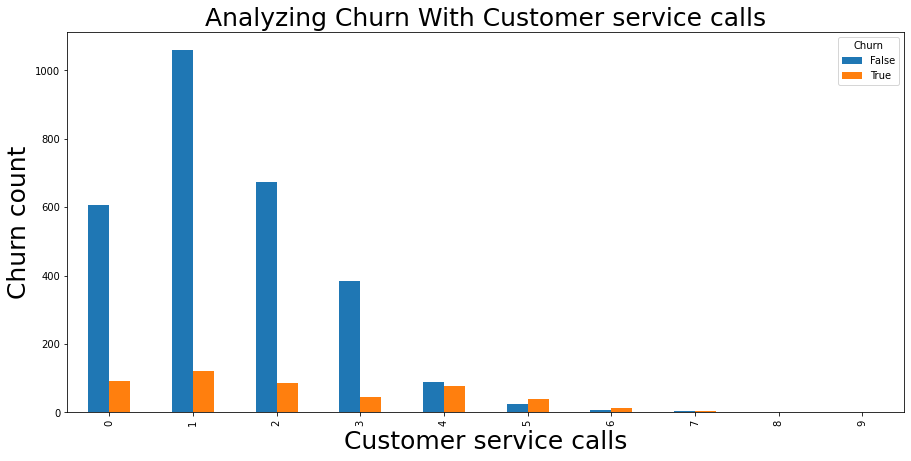

In [ ]:
#  Analyzing Churn with customer service calls
relation_bar('Customer service calls','Churn')

* Here we can see, when the service calls are 0, 1, 2, 3 there is no such issues.
* But when the customer service call is 4 or more than 4, we can see some actions of churning. Which indicates that customers with more service calls is going to churn very easily. 

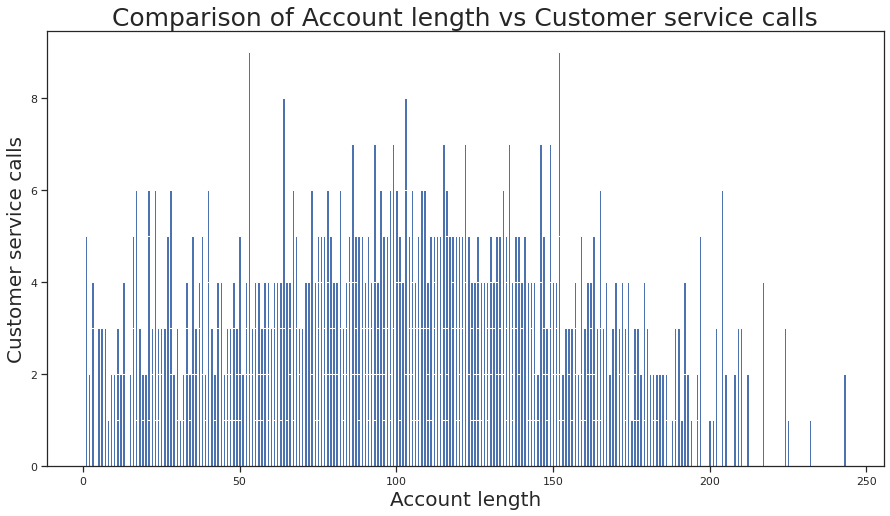

In [ ]:
#  Here we comparing the account length with the customer service calls
plt.bar(telco_df["Account length"], telco_df["Customer service calls"])
plt.rcParams['figure.figsize'] = (15,7)
plt.xlabel('Account length', fontsize = 20)
plt.ylabel('Customer service calls', fontsize = 20)
plt.title('Comparison of Account length vs Customer service calls',size = 25)
plt.show()

* We can see a variation in account length around 50 to 150. So we can't clearly found anything relatable from this.

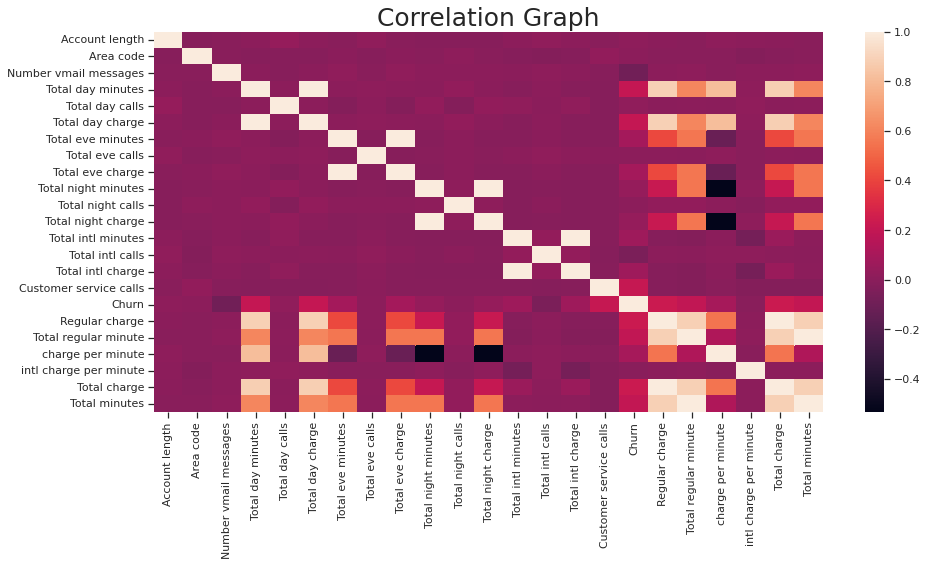

In [ ]:
# Correlating every column of the data
sns.heatmap(telco_df.corr())
plt.title('Correlation Graph',size =25)
plt.show()

* In the correlation graph we can see that churn is related to charges, minutes and customer service call in some extent.
* So now let's analyze this relations and find the cause. 

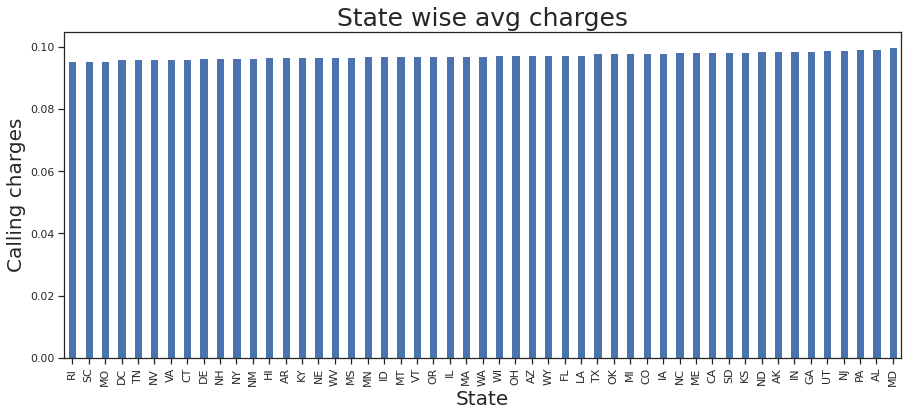

In [ ]:
# Here we are going to relate the state wise total chages taken
telco_df.groupby(['State'])['charge per minute'].mean().sort_values(ascending = True).plot.bar()
plt.rcParams['figure.figsize'] = (15,6)
plt.xlabel('State', fontsize = 20)
plt.ylabel('Calling charges', fontsize = 20)
plt.title('State wise avg charges',size = 25)
plt.show()

* Here we can see that the call charge rate is higher in state code 'MD' and lowest in 'RI'.
* We can see that 'CA' which has lowest customer has a higher charge rate.

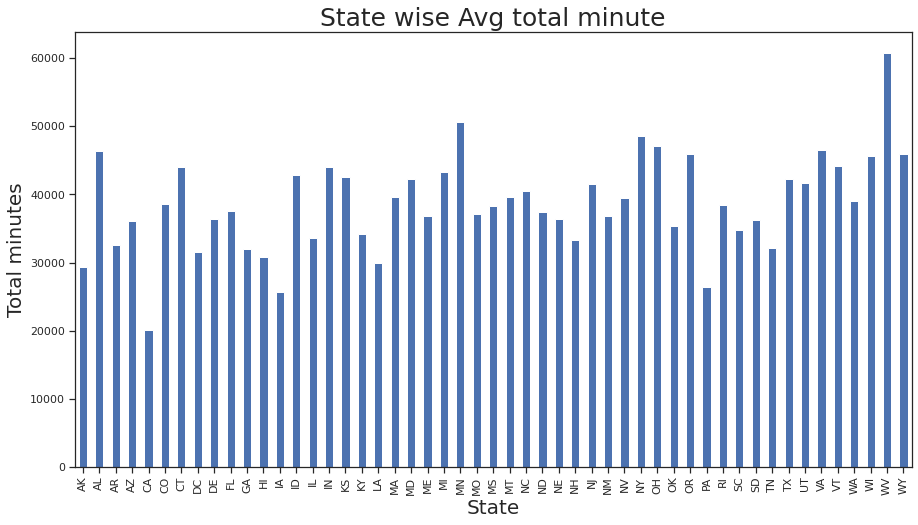

In [ ]:
# Now we are going to analyze between the total call minutes with states
telco_df.groupby('State')['Total minutes'].sum()
plt.figure(figsize=(15, 8))
telco_df.groupby('State')['Total minutes'].sum().plot.bar()
plt.xlabel("State", size=20)
plt.ylabel("Total minutes", size=20)
plt.title('State wise Avg total minute',size = 25)
plt.show()

* Here also the state which has highest minutes of call is 'WV' and the least in "CA'

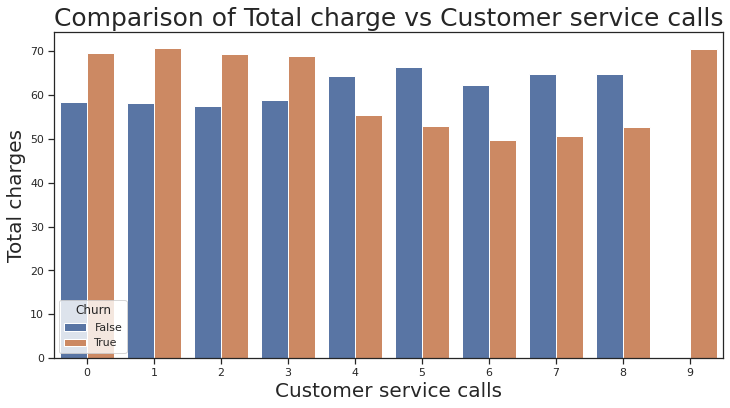

In [ ]:
# Here we are going to analyze between the total charges to the customer service calls
plt.figure(figsize=(12,6))
sns.barplot(data = telco_df, x = 'Customer service calls', y = 'Total charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 20)
plt.ylabel('Total charges', fontsize = 20)
plt.title('Comparison of Total charge vs Customer service calls',size = 25)
plt.show()

* Here we have seen that, the 1st 3 lines shows the pricing of charges leads to customer service calls which may results in churning.
* But we can't the same for rest lines.But when there is 9 customer service calls there is all in churned.

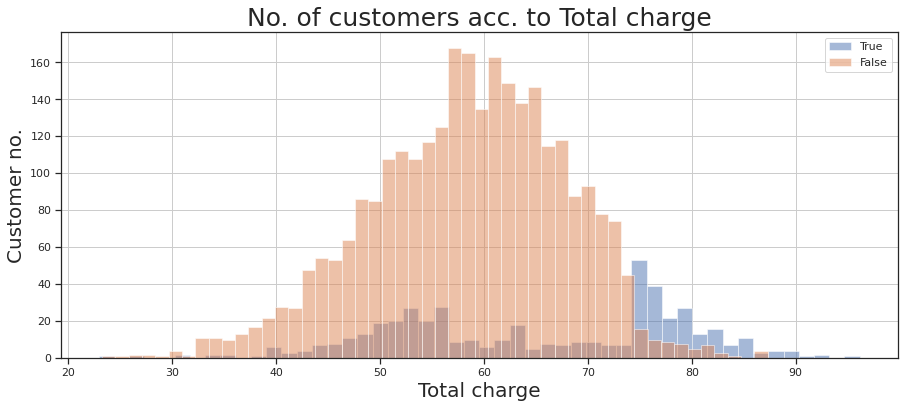

In [ ]:
# Finding the relation between total charges to number of customers and relate with churn
true = telco_df.loc[telco_df['Churn']==True]
false = telco_df.loc[telco_df['Churn']==False]
true['Total charge'].hist(bins = 50 ,alpha = 0.5, label = 'True' )
false['Total charge'].hist(bins = 50 ,alpha = 0.5, label = 'False' )
plt.xlabel('Total charge', fontsize = 20)
plt.ylabel('Customer no.', fontsize = 20)
plt.title('No. of customers acc. to Total charge',size = 25)
plt.legend()
plt.show()

* From this we see when the price rate go beyond 74 units, there is clear show of churning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


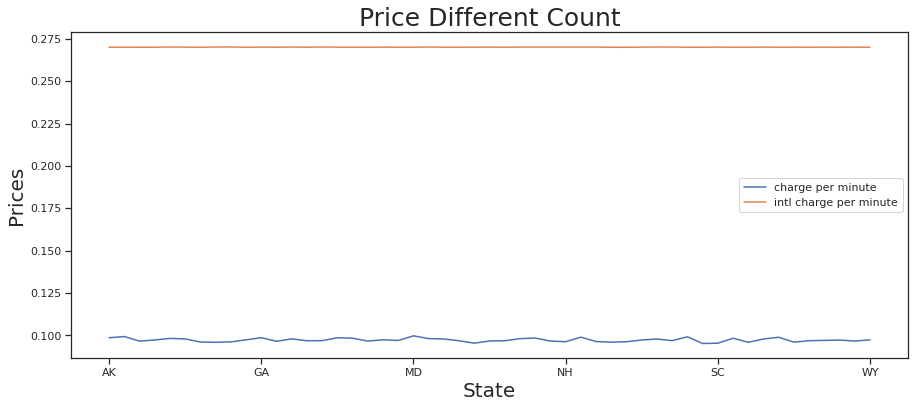

In [ ]:
# Checking the difference between intl price and local price
charges = telco_df.groupby(['State'])['charge per minute', 'intl charge per minute'].mean()
charges.plot()
plt.title('Price Different Count',size = 25)
plt.ylabel('Prices',size = 20)
plt.xlabel('State',size = 20)
plt.show()

* By this graph we can see that there is huge difference between the local charges to the intl charges. Which refers that the high pricing of intl charge may cause churning.

# 5. CONCLUSION

# 6. RECOMANDATION